In [1]:
import pandas as pd
from functions.display_plots import FeatureVisualizer
from functions.feature_stats import FeatureStats
from functions.feature_relations import FeatureRelations
from scipy.stats import shapiro

import seaborn as sns
from matplotlib import pyplot as plt

# I. Mean Features  
### Overview of Mean-based Measurements

In [2]:
data = pd.read_csv('../data/subsets_preprocessed/subset_mean.csv')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
# Values: 0: Benign; 1: Malignant
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## 1. Radius Mean

###### **radius_mean:** The mean of the distances from the center of the tumor to the perimeter. It reflects the average size of the tumor.

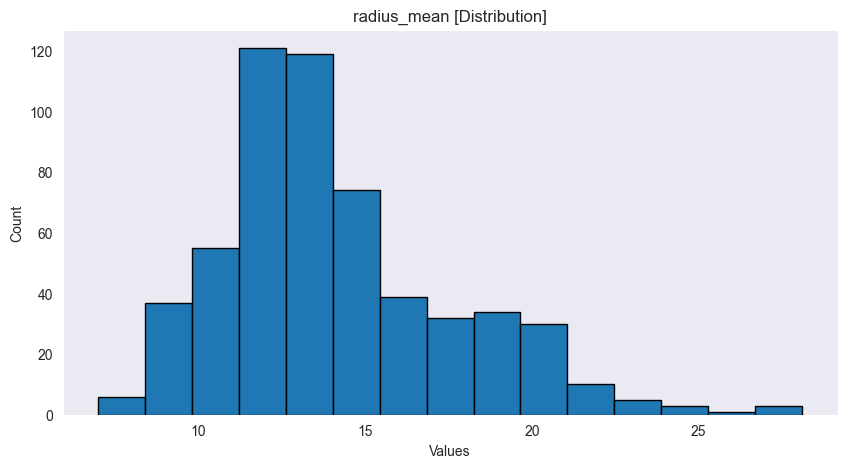

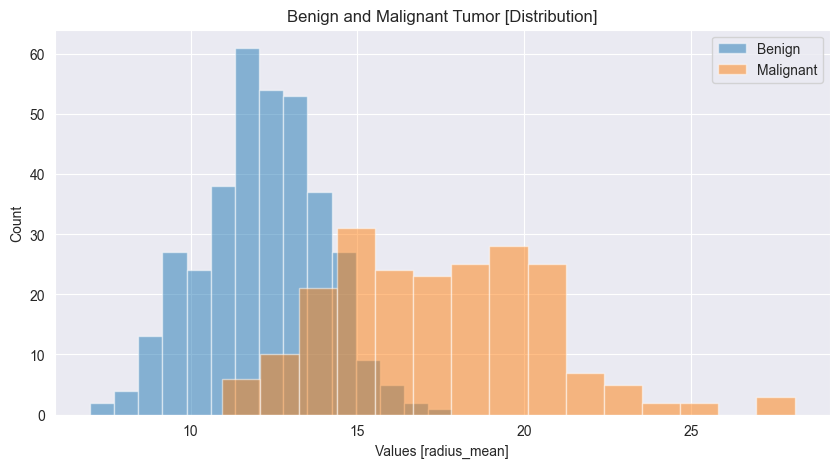

In [4]:
radius_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="radius_mean")
radius_mean_feature.display_all()

### Conclusions
- Benign distribution looks like a normal (Gaussian)
- Malignant distribution looks like a bimodal
- In the next tests will determines what are the exact distributions

### Statistical analysis with Boxplot and t-test

### Boxplot - Radius Mean
This boxplot illustrate the distribution of `Radius Mean values`, allowing comparison between Negative and Positive results

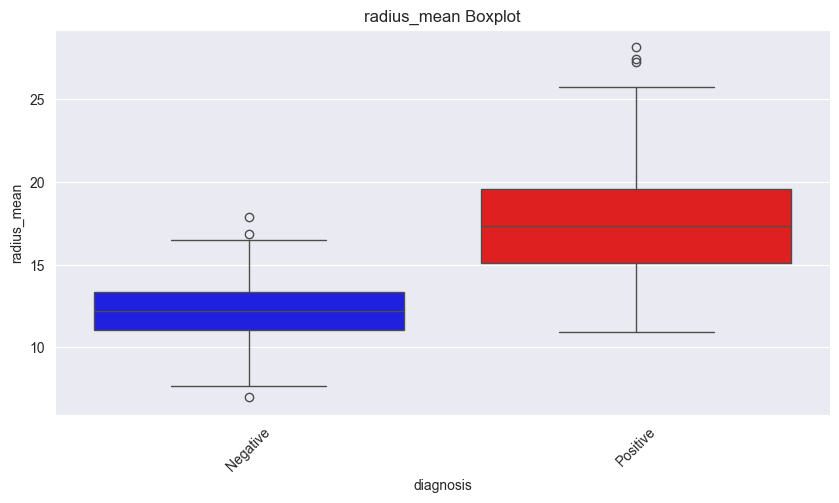

In [5]:
stat_analysis = FeatureStats(dataset=data, target_column='diagnosis', feature='radius_mean')
stat_analysis.display_boxplot()

### t-test analysis
With this test we will determine is there or not relationship between the diagnosis groups and the Radius mean feature.

In [6]:
stat_analysis.display_ttest()

,Feature,t-statistic,p-value
0,radius_mean,-25.435822,8.465941e-96


### Conclusions:
`t-statistic:` measure the difference between the means of two groups relative to the variation within the groups.<br>It shows how many times larger the mean difference is compared to the noise in data<br>
`p-value:`  If **p-value** is too small, we reject $H_0$ (the null hypothesis) as in our case. <br>
It's mean there is significant relationship between the groups.

## 2. Texture Mean

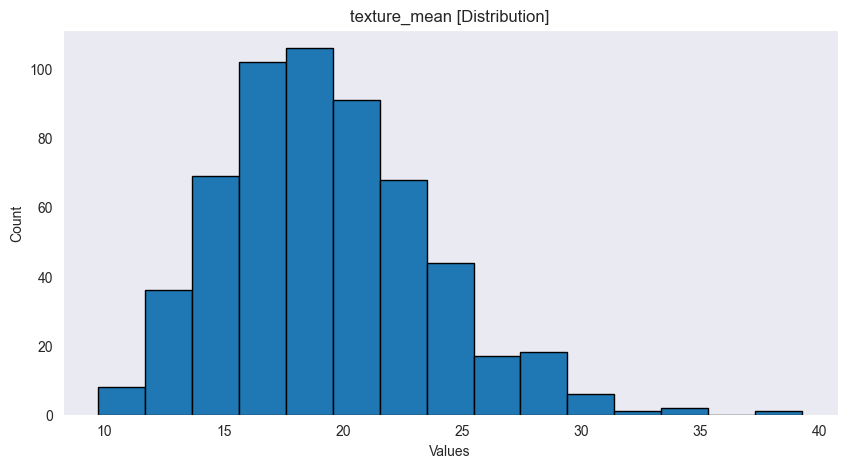

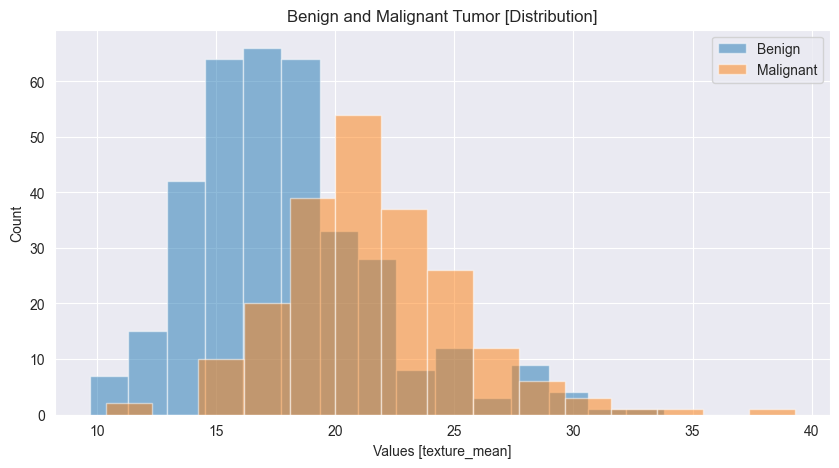

In [7]:
texture_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="texture_mean")
texture_mean_feature.display_all()

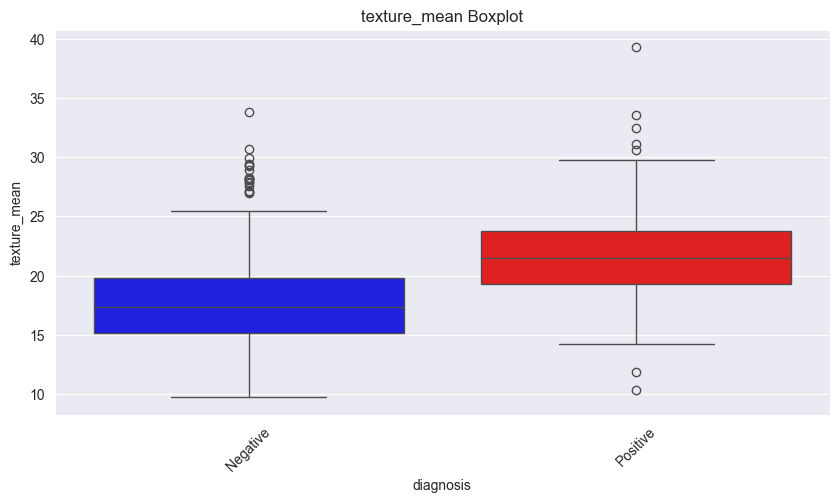

In [8]:
stat_analysis = FeatureStats(dataset=data, target_column='diagnosis', feature='texture_mean')
stat_analysis.display_boxplot()

In [9]:
stat_analysis.display_ttest()

,Feature,t-statistic,p-value
0,texture_mean,-10.867201,4.058636e-25


###

In [10]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## 3. Perimeter Mean

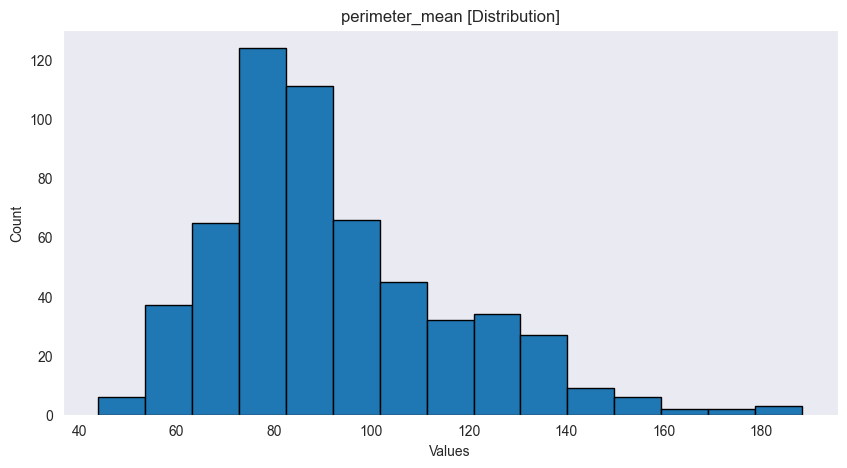

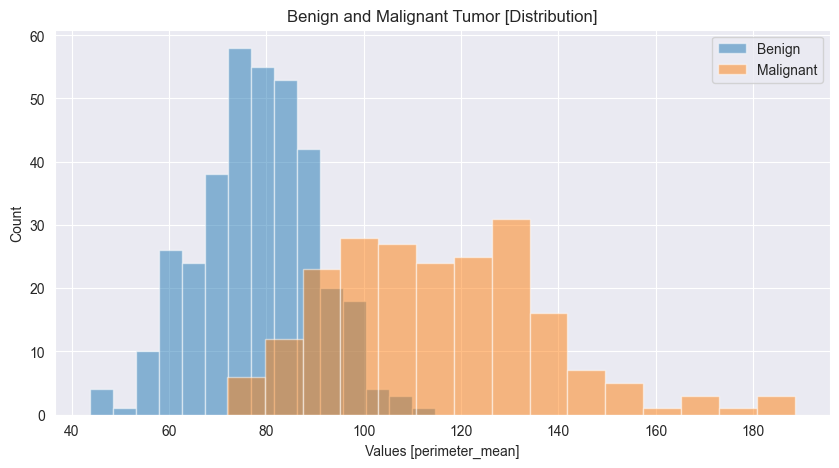

In [11]:
texture_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="perimeter_mean")
texture_mean_feature.display_all()

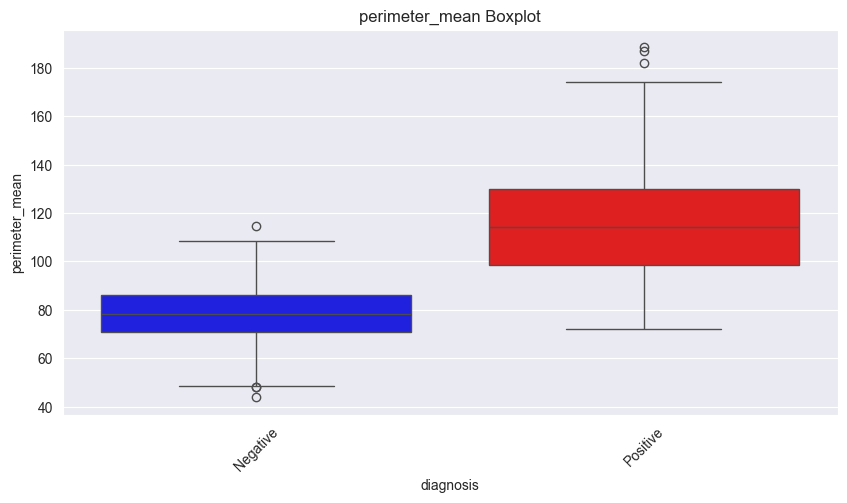

In [12]:
stat_analysis_perimeter_mean = FeatureStats(dataset=data, target_column='diagnosis', feature='perimeter_mean')
stat_analysis_perimeter_mean.display_boxplot()

In [13]:
stat_analysis_perimeter_mean.display_ttest()

,Feature,t-statistic,p-value
0,perimeter_mean,-26.405213,8.436251e-101
